<a href="https://colab.research.google.com/github/hfelizzola/Curso-Estadistica/blob/main/Estadisticas_Descriptivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadísticas descriptivas

In [1]:
# 1. Importa librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# 2. Conectar con la carpeta de drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
# 3. Configurar el directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Estadistica')

In [146]:
!ls

datos_clase.gsheet		 estatura_peso_clase.xlsx  W92S73-XLS-ENG.xlsx
Estadisticas_Descriptivas.ipynb  movies.xlsx


In [147]:
# 4. Cargar datos de las peliculas
movies = pd.read_excel("movies.xlsx")
movies.head()

,movie,budget,box_dom,box_world,distributor,genre,mpaa,month,day,year
0,The Legend of Hercules,70.0,18.848538,61.402445,Lionsgate,Adventure,PG-13,1,10,2014
1,Gangster Squad,60.0,46.000903,104.100903,Warner Bros.,Drama,R,1,11,2013
2,Quartet,11.0,18.388357,56.178935,Weinstein Co.,Comedy,PG-13,1,11,2013
3,A Haunted House,2.5,40.041683,59.922558,Open Road,Comedy,R,1,11,2013
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012


## Tablas de frecuencia y gráficos

### Genero

In [148]:
# Frecuencia
movies.groupby("genre").size().sort_values(ascending=False)

genre
Drama                  239
Comedy                 163
Thriller/Suspense      120
Action                 105
Adventure               96
Horror                  54
Romantic Comedy         38
Documentary             22
Black Comedy            16
Musical                  9
Concert/Performance      7
Western                  4
dtype: int64

La tabla tiene 873 filas y 10 columnas

In [149]:
# Consultar número de filas y columnas de la tabla
movies.shape

(873, 10)

In [150]:
# Porcentaje
movies.groupby("genre").size().sort_values(ascending=False)/movies.shape[0]

genre
Drama                  0.273769
Comedy                 0.186712
Thriller/Suspense      0.137457
Action                 0.120275
Adventure              0.109966
Horror                 0.061856
Romantic Comedy        0.043528
Documentary            0.025200
Black Comedy           0.018328
Musical                0.010309
Concert/Performance    0.008018
Western                0.004582
dtype: float64

In [151]:
# Porcentaje acumulado
movies.groupby("genre").size().sort_values(ascending=False).cumsum()/movies.shape[0]

genre
Drama                  0.273769
Comedy                 0.460481
Thriller/Suspense      0.597938
Action                 0.718213
Adventure              0.828179
Horror                 0.890034
Romantic Comedy        0.933562
Documentary            0.958763
Black Comedy           0.977090
Musical                0.987400
Concert/Performance    0.995418
Western                1.000000
dtype: float64

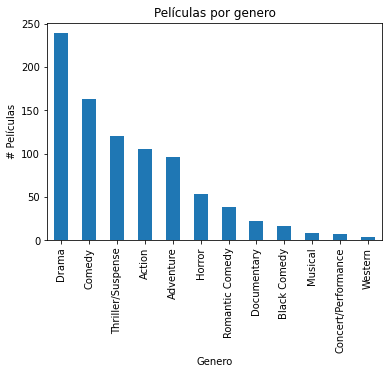

In [152]:
movies.groupby("genre").size().sort_values(ascending=False).plot.bar()
plt.title("Películas por genero")
plt.xlabel("Genero")
plt.ylabel("# Películas")
plt.show()

<AxesSubplot:ylabel='None'>

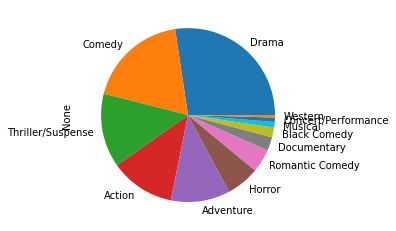

In [153]:
movies.groupby("genre").size().sort_values(ascending=False).plot.pie()

### Distributor

In [154]:
(movies.groupby("distributor").size().sort_values(ascending=False)/movies.shape[0]).reset_index(name='Porcentaje')

,distributor,Porcentaje
0,Warner Bros.,0.112257
1,Sony Pictures,0.091638
2,Universal,0.085911
3,20th Century Fox,0.083620
4,Paramount Pictures,0.066438
...,...,...
96,Brothers' Ink Productions,0.001145
97,Peace Film LLC,0.001145
98,Phase 4 Films,0.001145
99,Picturehouse,0.001145


Cuando se tiene una numero considerable de categorías, se recomienda gráficar los mas importantes según su frecuencia o porcentaje.

In [155]:
movies.groupby("distributor").size()

distributor
20th Century Fox             73
A24                           8
AFFRM                         1
ARC Entertainment             1
Alchemy                       6
                             ..
Weinstein Co.                37
Weinstein/Dimension           2
Well Go USA                   1
Wrekin Hill Entertainment     2
Yash Raj Films                1
Length: 101, dtype: int64

## Distribución de frecuencia

In [156]:
# Distribución de frecuencia
int_budget = np.arange(0,330,30)
np.histogram(movies['budget'], bins=int_budget)


(array([474, 184,  75,  36,  39,  29,  21,   6,   5,   4]),
 array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300]))

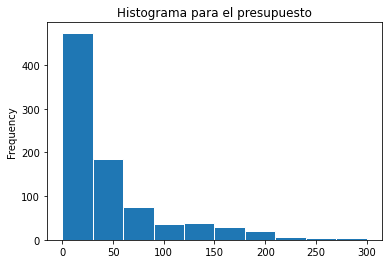

In [157]:
movies['budget'].plot.hist(bins=int_budget, edgecolor='w')
plt.title("Histograma para el presupuesto")
plt.show()

## Estadísticas descriptivas

In [158]:
# Resumen estadístico de las columnas numéricas
movies[['budget','box_dom','box_world']].describe()

,budget,box_dom,box_world
count,873.000000,873.000000,873.000000
mean,44.446338,57.448418,143.170251
std,54.005903,84.265678,235.686308
min,0.003967,0.000000,0.000000
25%,8.000000,4.231500,10.106975
50%,25.000000,30.542576,56.238045
75%,58.000000,72.688614,160.903019
max,300.000000,928.788515,2050.788515


In [159]:
# Media
movies['budget'].mean()

44.44633787743414

In [160]:
# Mediana
movies['budget'].median()

25.0

In [161]:
# Moda
movies['budget'].mode()

0    40.0
dtype: float64

In [162]:
# Varianza
movies['budget'].var()

2916.6375758285676

In [163]:
# Desviación estandar
movies['budget'].std()

54.00590315723428

In [164]:
# Rango
movies['budget'].max() - movies['budget'].min()

299.996033

In [165]:
# Coeficiente de asimetria
movies['budget'].skew()

1.88647826624673

In [166]:
# Curtosis
movies['budget'].kurt()

3.3780346028665864

In [167]:
# Cuartiles
movies['budget'].quantile([0.25,0.50,0.75])

0.25     8.0
0.50    25.0
0.75    58.0
Name: budget, dtype: float64

In [168]:
# Deciles
movies['budget'].quantile(np.arange(0.1,1,0.1))

0.1      1.5
0.2      5.0
0.3     10.0
0.4     17.0
0.5     25.0
0.6     35.0
0.7     45.4
0.8     70.0
0.9    130.0
Name: budget, dtype: float64

## Análisis datos de la clase

In [169]:
# 4. Cargar los datos de peso y estatura del curso
curso = pd.read_excel("estatura_peso_clase.xlsx")
curso.head()

,Peso,Estatura
0,76.0,1.89
1,67.0,1.73
2,53.0,1.64
3,50.0,1.47
4,53.0,1.57


### Análisis del Peso

In [170]:
# Promedio del peso
curso["Peso"].mean()

64.06666666666666

In [171]:
# Mediana del peso
curso["Peso"].median()

64.0

In [172]:
# Moda
curso["Peso"].mode()

0    53.0
1    63.0
dtype: float64

In [173]:
# Mínimo del peso
curso["Peso"].min()

50.0

In [174]:
# Máximo del peso
curso["Peso"].max()

76.0

In [175]:
# Rango
curso["Peso"].max() - curso["Peso"].min()

26.0

In [176]:
# Varianza muestral del peso n-1
curso["Peso"].var()

68.63809523809522

In [177]:
# Desviación estandar
curso["Peso"].std()

8.284811116621501

In [178]:
# Coeficiente de variación para el peso
(curso["Peso"].std()/curso["Peso"].mean())*100

12.931547008254165

In [179]:
# Cuartiles para el peso
curso["Peso"].quantile([0.25, 0.50, 0.75])

0.25    58.5
0.50    64.0
0.75    71.0
Name: Peso, dtype: float64

In [180]:
# Resumen estadístico de la columna peso
curso["Peso"].describe()

count    15.000000
mean     64.066667
std       8.284811
min      50.000000
25%      58.500000
50%      64.000000
75%      71.000000
max      76.000000
Name: Peso, dtype: float64

In [181]:
# Resumen de toda la tabla: peso y estatura
curso.describe()

,Peso,Estatura
count,15.000000,15.000000
mean,64.066667,1.696667
std,8.284811,0.108145
min,50.000000,1.470000
25%,58.500000,1.630000
50%,64.000000,1.730000
75%,71.000000,1.775000
max,76.000000,1.890000


In [182]:
clases = np.arange(50,85,5)
clases

array([50, 55, 60, 65, 70, 75, 80])

In [183]:
# Distribucion de frecuencia
clases = np.arange(50,85,5)
np.histogram(curso["Peso"], bins=clases)

(array([3, 1, 4, 2, 3, 2]), array([50, 55, 60, 65, 70, 75, 80]))

<AxesSubplot:ylabel='Frequency'>

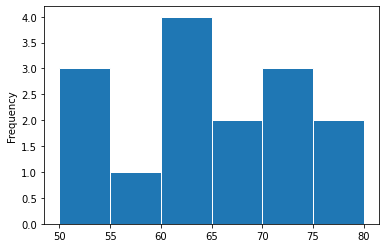

In [184]:
# Histograma
curso["Peso"].plot.hist(bins=clases, edgecolor="w")

<AxesSubplot:>

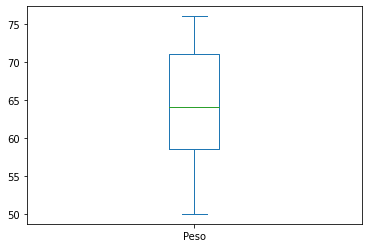

In [185]:
# Boxplot peso
curso["Peso"].plot.box()

## Análisis de Correlación

Recuerde que la correlación se calcula a partir de la covarianza:

$$
Cov(x,y) = \frac{\sum_{i=1}^{n}(x_i - \bar x)((y_i - \bar y))}{n-1}
$$

Con esto se calcula la correlación:
$$
\rho = \frac{cov(x,y)}{s_xs_y}
$$

Donde, $s_x$ y $s_y$ es la desviación estándar de $x$ y $y$ respectivamente. A continuación, se presenta el calculo paso a paso de la covarianza y la correlación.

In [186]:
peso = np.array([70, 50, 53, 64, 57])
estatura = np.array([1.8, 1.47, 1.57, 1.77, 1.62])

In [187]:
peso.mean()

58.8

In [188]:
peso.std(ddof=1)

8.167006795638168

In [189]:
estatura.mean()

1.6460000000000001

In [190]:
estatura.std(ddof=1)

0.13831124321616087

In [191]:
peso - peso.mean()

array([11.2, -8.8, -5.8,  5.2, -1.8])

In [192]:
peso.shape[0]

5

In [193]:
cov_xy = ((peso - peso.mean())*(estatura -  estatura.mean())).sum()/(peso.shape[0] - 1)
cov_xy

1.1015000000000001

In [194]:
coef_correl = cov_xy/(peso.std(ddof=1)*estatura.std(ddof=1))
coef_correl

0.9751335515308679

In [195]:
np.corrcoef(peso, estatura)

array([[1.        , 0.97513355],
       [0.97513355, 1.        ]])

Text(0, 0.5, 'Peso')

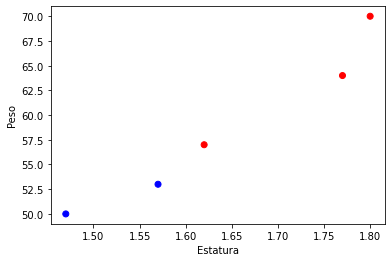

In [196]:
plt.scatter(x=estatura, y=peso, c=["r","b","b","r","r"])
plt.xlabel("Estatura")
plt.ylabel("Peso")

## Análisis de correlación para las peliculas

In [197]:
movies

,movie,budget,box_dom,box_world,distributor,genre,mpaa,month,day,year
0,The Legend of Hercules,70.0,18.848538,61.402445,Lionsgate,Adventure,PG-13,1,10,2014
1,Gangster Squad,60.0,46.000903,104.100903,Warner Bros.,Drama,R,1,11,2013
2,Quartet,11.0,18.388357,56.178935,Weinstein Co.,Comedy,PG-13,1,11,2013
3,A Haunted House,2.5,40.041683,59.922558,Open Road,Comedy,R,1,11,2013
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012
...,...,...,...,...,...,...,...,...,...,...
868,Bucky Larson: Born to Be a Star,10.0,2.529395,2.529395,Sony Pictures,Comedy,R,9,9,2011
869,Creature,3.0,0.327000,0.327000,The Bubble Factory,Horror,R,9,9,2011
870,Tanner Hall,3.0,0.005073,0.005073,Anchor Bay Entertainment,Drama,R,9,9,2011
871,Warrior,25.0,13.657115,24.215385,Lionsgate,Drama,PG-13,9,9,2011


<AxesSubplot:xlabel='box_dom', ylabel='box_world'>

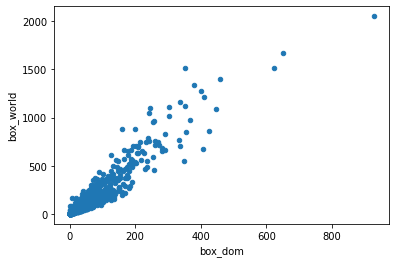

In [198]:
movies.plot.scatter(x='box_dom',y='box_world')

<AxesSubplot:xlabel='box_dom', ylabel='box_world'>

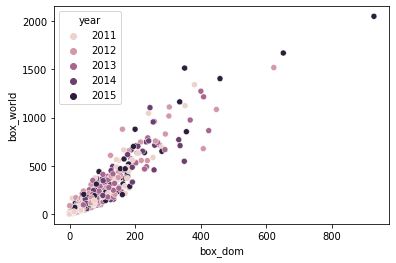

In [199]:
sns.scatterplot(data=movies, x='box_dom', y='box_world', hue='year')

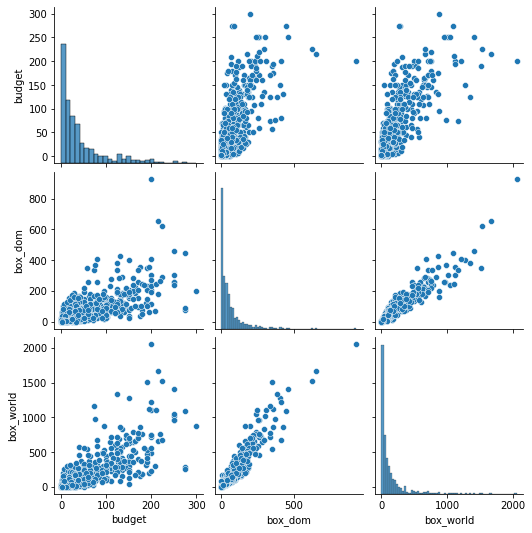

In [200]:
# Gráficos de dispersión entre variables numéricas e histogramas
sns.pairplot(movies[['budget','box_dom','box_world']])

In [201]:
movies[['budget','box_dom','box_world']].corr()

,budget,box_dom,box_world
budget,1.000000,0.715714,0.786801
box_dom,0.715714,1.000000,0.946223
box_world,0.786801,0.946223,1.000000


## Estadísticas agrupadas

Se utiliza para variable numerica vs categorica

<AxesSubplot:xlabel='genre'>

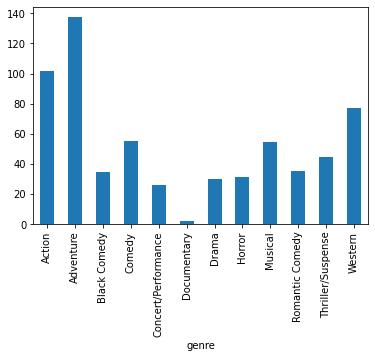

In [202]:
movies.groupby("genre")["box_dom"].mean().plot.bar()

<AxesSubplot:xlabel='genre'>

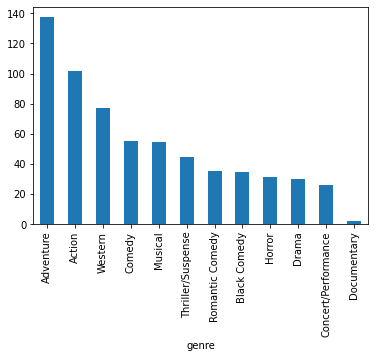

In [203]:
movies.groupby("genre")["box_dom"].mean().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='genre'>

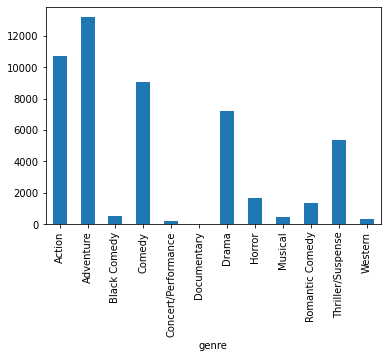

In [204]:
movies.groupby("genre")["box_dom"].sum().plot.bar()

## Gráficos de cajas por grupos

<AxesSubplot:xlabel='box_dom', ylabel='genre'>

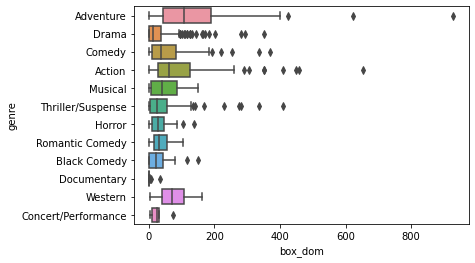

In [205]:
# Comparar ingresos de peliculas por genero a través de gráficos de caja
sns.boxplot(data=movies, x='box_dom', y='genre', orient='h')

## Pivoteo 

In [208]:
movies.pivot_table(index='genre', columns='mpaa', values='box_dom', aggfunc='mean', fill_value=0)

mpaa,G,NC-17,Not Rated,PG,PG-13,R
genre,,,,,,
Action,0.000000,0.000000,3.720686,0.000000,144.710700,44.540632
Adventure,127.142700,0.000000,0.004091,111.006048,204.006527,54.315522
Black Comedy,0.000000,0.000000,0.024956,0.000000,26.597757,42.065376
Comedy,121.066007,0.000000,0.021896,89.566775,49.276181,50.915356
Concert/Performance,73.013910,0.000000,0.000000,22.020614,0.000000,14.456818
Documentary,0.101531,0.000000,0.226297,16.711109,2.666423,0.000000
Drama,1.891936,4.002293,0.306855,39.259077,42.629844,21.905774
Horror,0.000000,0.000000,0.016348,80.069458,33.606848,30.270930
Musical,0.000000,0.000000,0.222098,73.643941,57.922981,38.518613


In [209]:
movies.pivot_table(index='month', columns='year', values='box_dom', aggfunc='mean', fill_value=0)

year,2011,2012,2013,2014,2015
month,,,,,
1,43.565118,34.038213,29.483456,49.977526,24.701615
2,41.378879,55.622366,36.755976,57.386689,47.044022
3,39.310798,78.682798,51.012079,47.102191,49.072288
4,38.238918,25.902664,26.231684,50.644644,43.281156
5,74.533391,105.301145,130.770365,90.705891,104.395781
6,104.359592,68.773073,110.016339,81.267567,134.571166
7,56.193518,95.397167,77.159770,49.553720,65.422967
8,32.642957,36.140728,44.157878,56.725919,36.651597
9,19.256815,26.166958,36.446425,26.110676,51.895295


<AxesSubplot:xlabel='month'>

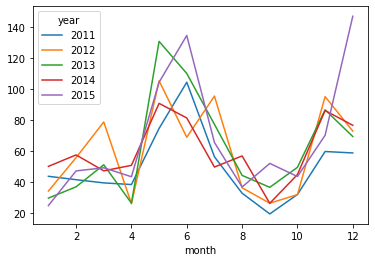

In [210]:
# Calcular estadísticas en relación a dos variables
movies.pivot_table(index='month', columns='year', values='box_dom', aggfunc='mean', fill_value=0).plot()

In [211]:
movies.pivot_table(index='genre', columns='mpaa', values='box_dom', aggfunc='median', fill_value=0)

mpaa,G,NC-17,Not Rated,PG,PG-13,R
genre,,,,,,
Action,0.000000,0.000000,3.720686,0.000000,98.780042,30.345383
Adventure,137.579122,0.000000,0.004091,83.950829,179.020854,11.704934
Black Comedy,0.000000,0.000000,0.024956,0.000000,9.204489,35.966501
Comedy,130.122961,0.000000,0.003677,62.595494,34.580201,34.296320
Concert/Performance,73.013910,0.000000,0.000000,25.326071,0.000000,7.706436
Documentary,0.101531,0.000000,0.020056,16.711109,2.540483,0.000000
Drama,1.891936,4.002293,0.018823,25.142632,23.917859,3.774981
Horror,0.000000,0.000000,0.016348,80.069458,30.374271,24.046682
Musical,0.000000,0.000000,0.222098,85.911262,41.367428,38.518613


In [212]:
movies.pivot_table(index='distributor', columns='genre', values='box_dom', aggfunc='count', fill_value=0)

genre,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
distributor,,,,,,,,,,,,
20th Century Fox,7,18,0,17,1,0,12,3,1,3,11,0
A24,0,0,0,2,0,0,1,1,0,1,3,0
AFFRM,0,0,0,0,0,0,1,0,0,0,0,0
ARC Entertainment,1,0,0,0,0,0,0,0,0,0,0,0
Alchemy,0,0,1,1,0,0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Weinstein Co.,1,4,1,7,0,0,18,0,0,0,4,2
Weinstein/Dimension,0,1,0,0,0,0,0,1,0,0,0,0
Well Go USA,0,0,0,0,0,0,1,0,0,0,0,0


## Manipulación de tablas

### Creación de una nueva columna

In [213]:
movies["box_total"] = movies["box_dom"] + movies["box_world"]
movies["profit"] = movies["box_total"] - movies["budget"]
movies

,movie,budget,box_dom,box_world,distributor,genre,mpaa,month,day,year,box_total,profit
0,The Legend of Hercules,70.0,18.848538,61.402445,Lionsgate,Adventure,PG-13,1,10,2014,80.250983,10.250983
1,Gangster Squad,60.0,46.000903,104.100903,Warner Bros.,Drama,R,1,11,2013,150.101806,90.101806
2,Quartet,11.0,18.388357,56.178935,Weinstein Co.,Comedy,PG-13,1,11,2013,74.567292,63.567292
3,A Haunted House,2.5,40.041683,59.922558,Open Road,Comedy,R,1,11,2013,99.964241,97.464241
4,Contraband,25.0,66.528000,98.406855,Universal,Action,R,1,13,2012,164.934855,139.934855
...,...,...,...,...,...,...,...,...,...,...,...,...
868,Bucky Larson: Born to Be a Star,10.0,2.529395,2.529395,Sony Pictures,Comedy,R,9,9,2011,5.058790,-4.941210
869,Creature,3.0,0.327000,0.327000,The Bubble Factory,Horror,R,9,9,2011,0.654000,-2.346000
870,Tanner Hall,3.0,0.005073,0.005073,Anchor Bay Entertainment,Drama,R,9,9,2011,0.010146,-2.989854
871,Warrior,25.0,13.657115,24.215385,Lionsgate,Drama,PG-13,9,9,2011,37.872500,12.872500


<AxesSubplot:xlabel='profit', ylabel='genre'>

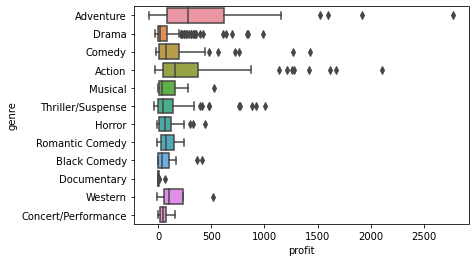

In [214]:
sns.boxplot(data=movies, x='profit', y='genre', orient='h')

### Filtrado

In [215]:
# Filtrar películas con ganancia negativa
movies.loc[movies["profit"] < 0]

,movie,budget,box_dom,box_world,distributor,genre,mpaa,month,day,year,box_total,profit
7,The Divide,3.0,0.018000,0.138274,Anchor Bay Entertainment,Thriller/Suspense,R,1,13,2012,0.156274,-2.843726
9,Down for Life,3.8,0.041914,0.041914,B.D. Fox Independent,Drama,R,1,14,2011,0.083828,-3.716172
12,Blackhat,70.0,7.889395,19.535476,Universal,Thriller/Suspense,R,1,16,2015,27.424871,-42.575129
26,R100,5.5,0.024956,0.024956,Drafthouse Films,Black Comedy,Not Rated,1,23,2015,0.049912,-5.450088
27,Song One,6.0,0.032251,0.032251,Cinedigm/Film Arcade,Drama,PG-13,1,23,2015,0.064502,-5.935498
...,...,...,...,...,...,...,...,...,...,...,...,...
860,Thunder and the House of Magic,34.0,0.004091,10.391684,Shout! Factory,Adventure,Not Rated,9,5,2014,10.395775,-23.604225
862,Winnie Mandela,15.0,0.061847,0.061847,Image Entertainment,Drama,R,9,6,2013,0.123694,-14.876306
868,Bucky Larson: Born to Be a Star,10.0,2.529395,2.529395,Sony Pictures,Comedy,R,9,9,2011,5.058790,-4.941210
869,Creature,3.0,0.327000,0.327000,The Bubble Factory,Horror,R,9,9,2011,0.654000,-2.346000


In [216]:
# Hacer tablas de frecuencia con este filtro
movies.loc[movies["profit"] < 0].groupby("genre").size()

genre
Action                 10
Adventure              10
Black Comedy            5
Comedy                 25
Concert/Performance     1
Documentary            16
Drama                  72
Horror                  7
Musical                 2
Romantic Comedy         4
Thriller/Suspense      26
Western                 1
dtype: int64

### Renombrar columnas

### Discretizar una variables

In [217]:
movies["profit"].describe()

count     873.000000
mean      156.172331
std       276.778110
min       -89.057484
25%         3.248973
50%        59.531361
75%       171.738126
max      2779.577030
Name: profit, dtype: float64

In [218]:
np.arange(-100, 2900, 100)

array([-100,    0,  100,  200,  300,  400,  500,  600,  700,  800,  900,
       1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000,
       2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800])

In [219]:
movies["profit_range"] = pd.cut(movies["profit"], bins=np.arange(-100, 2900, 100))

In [220]:
movies.groupby("profit_range").size()

profit_range
(-100, 0]       179
(0, 100]        366
(100, 200]      133
(200, 300]       65
(300, 400]       34
(400, 500]       20
(500, 600]       18
(600, 700]       11
(700, 800]       14
(800, 900]        8
(900, 1000]       6
(1000, 1100]      4
(1100, 1200]      2
(1200, 1300]      4
(1300, 1400]      0
(1400, 1500]      2
(1500, 1600]      2
(1600, 1700]      2
(1700, 1800]      0
(1800, 1900]      0
(1900, 2000]      1
(2000, 2100]      0
(2100, 2200]      1
(2200, 2300]      0
(2300, 2400]      0
(2400, 2500]      0
(2500, 2600]      0
(2600, 2700]      0
(2700, 2800]      1
dtype: int64